In [1]:
!pip install inference-sdk

In [2]:
!pip install inference-cli && inference server start

Command failed. Cause: Error connecting to Docker daemon. Is docker installed and running? See https://www.docker.com/get-started/ for installation instructions.


C:\Users\SRIRAM\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
!pip install opencv-python

In [4]:
!pip install opencv-python-headless

In [5]:
!pip install opencv-contrib-python

In [6]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


Detected angle: 87.07927703857422
Corrected angle: 0


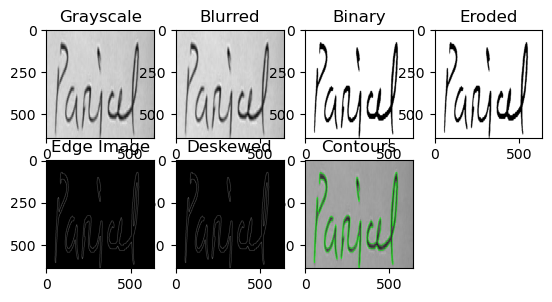

True

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(3, 4, 1)
    plt.title("Grayscale")
    plt.imshow(gray, cmap='gray')
    
    # Remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.subplot(3, 4, 2)
    plt.title("Blurred")
    plt.imshow(blurred, cmap='gray')
    
    # Thresholding/Binarization
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.subplot(3, 4, 3)
    plt.title("Binary")
    plt.imshow(binary, cmap='gray')
    
    # Dilation and Erosion
    kernel = np.ones((1, 1), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    plt.subplot(3, 4, 4)
    plt.title("Eroded")
    plt.imshow(eroded, cmap='gray')
    
    # Display the original image and the edge-detected image
    edges = cv2.Canny(eroded, 100, 200)
    #plt.subplot(121), plt.imshow(deskewed, cmap='gray')
    #plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,4,5) 
    plt.title('Edge Image')
    plt.imshow(edges, cmap='gray')

    
    # Deskewing
    coords = np.column_stack(np.where(edges > 0))
    angle = cv2.minAreaRect(coords)[-1]
    print(f"Detected angle: {angle}") 
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
        
    angle = 0
    print(f"Corrected angle: {angle}") 
    (h, w) = edges.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed = cv2.warpAffine(edges, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    plt.subplot(3, 4, 6)
    plt.title("Deskewed")
    plt.imshow(deskewed, cmap='gray')
    
    # Find contours
    contours, hierarchy = cv2.findContours(deskewed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    plt.subplot(3, 4, 7)
    plt.title('Contours')
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

    plt.show()
    
    return contour_image

# Example usage
preprocessed_image = preprocess_image('img2.jpg') ##################-----------Input image from user ------------- ####################################################################
cv2.imwrite('preprocessed_image_2.jpg', preprocessed_image)


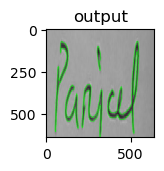

In [15]:
plt.subplot(3, 4, 6)
plt.title("output")
plt.imshow(preprocessed_image, cmap='gray')

{'inference_id': '6305015b-5ddc-467e-885d-3420a70ba722', 'time': 0.04288071599967225, 'image': {'width': 640, 'height': 640}, 'predictions': [{'x': 252.0, 'y': 441.0, 'width': 90.0, 'height': 346.0, 'confidence': 0.9406572580337524, 'class': 'r', 'class_id': 51, 'detection_id': 'dc7cbac0-388d-447a-b421-0ecbc4475664'}, {'x': 96.5, 'y': 307.0, 'width': 105.0, 'height': 612.0, 'confidence': 0.9316421151161194, 'class': 'P', 'class_id': 24, 'detection_id': '66c427ca-1f78-42ed-975b-f0e431671502'}, {'x': 456.0, 'y': 448.0, 'width': 66.0, 'height': 302.0, 'confidence': 0.9119941592216492, 'class': 'e', 'class_id': 38, 'detection_id': '2b792c76-9507-4d3e-8a46-86852e95fba5'}, {'x': 528.5, 'y': 313.5, 'width': 51.0, 'height': 607.0, 'confidence': 0.902350902557373, 'class': 'l', 'class_id': 45, 'detection_id': 'd0ce1d99-622c-4190-91da-4f5cf1a599b3'}, {'x': 392.5, 'y': 434.0, 'width': 61.0, 'height': 252.0, 'confidence': 0.8771288394927979, 'class': 'c', 'class_id': 36, 'detection_id': '24df5aee-

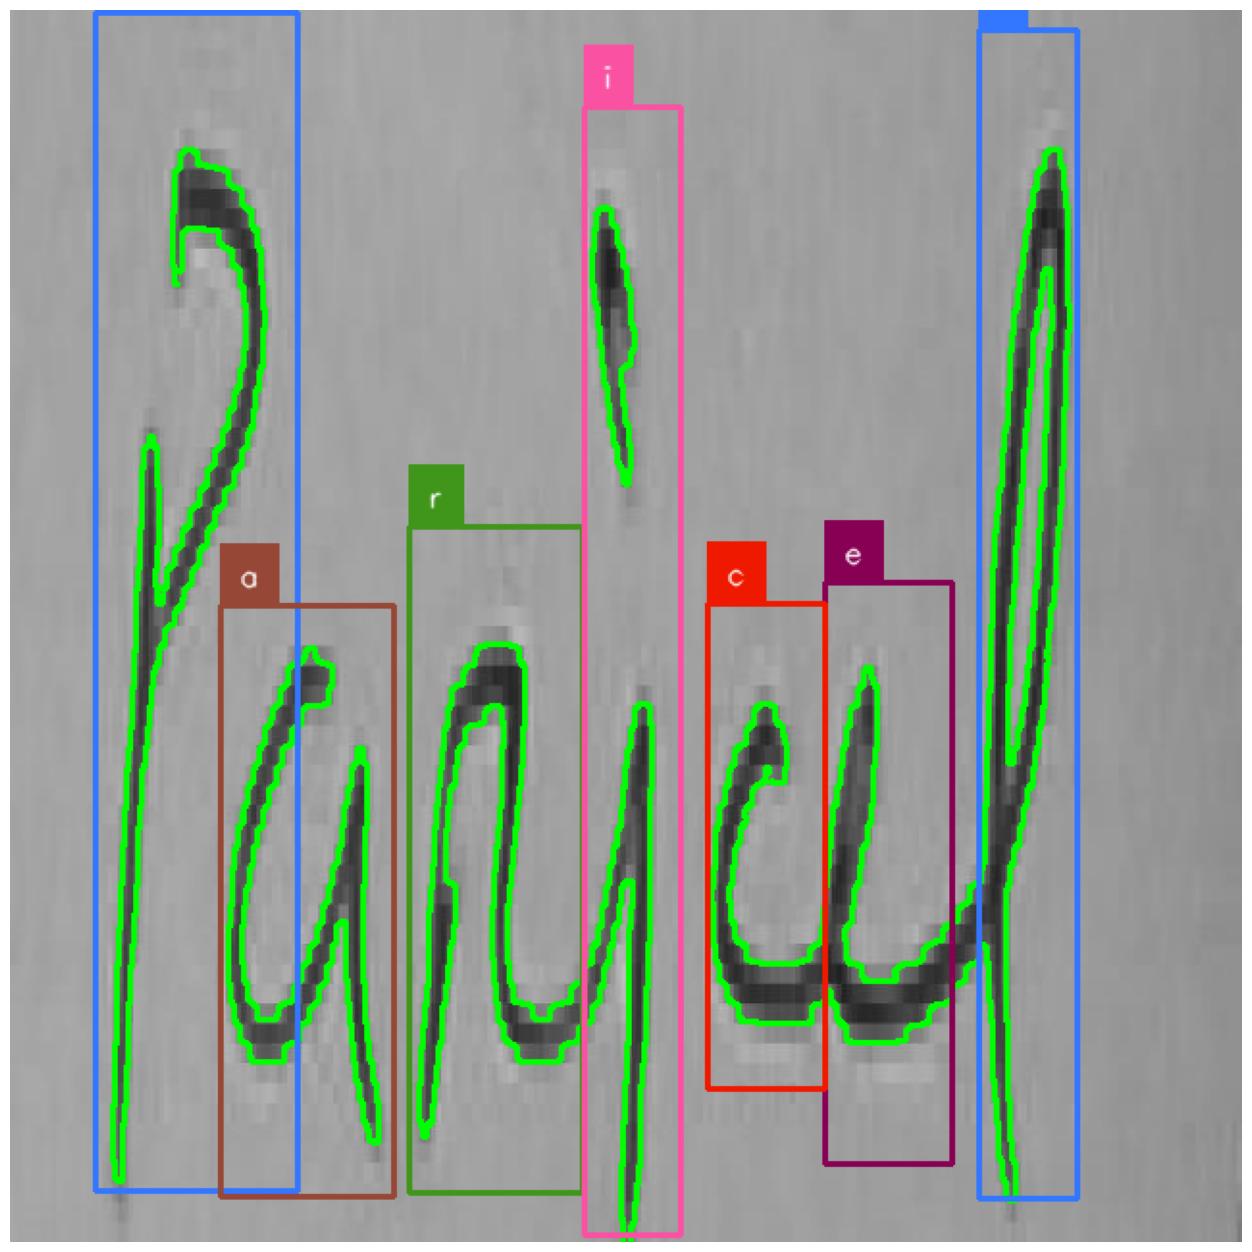

In [17]:
import os
from PIL import Image
from inference_sdk import InferenceHTTPClient
from roboflow import Roboflow
from PIL import Image
import supervision as sv
import cv2


CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="LSbJ0tl3WTLn4Aqar0Sp"
)


# Load the image
#doc_img = Image.open("preprocessed_image.jpg")

#preprocessed_image_path  = Image.open(preprocessed_image)

# Perform inference
result_doch1 = CLIENT.infer(preprocessed_image, model_id="doctor-s-handwriting/1")

# Print or process the result
print(result_doch1)


#rf = Roboflow(api_key="YkIPrzXAAK6EbPk1Ehjv")
#project = rf.workspace().project("doctor-s-handwriting/1")
#model = project.version(6).model

#result = model.predict("preprocessed_image_2.jpg", confidence=40, overlap=30).json()

labels = [item["class"] for item in result_doch1["predictions"]]

detections = sv.Detections.from_inference(result_doch1)

image_np = np.array(preprocessed_image)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

#image = cv2.imread(preprocessed_image_path)

annotated_image = bounding_box_annotator.annotate(
    scene=image_np, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

annotated_image_pil = Image.fromarray(annotated_image)

sv.plot_image(image=annotated_image_pil, size=(16, 16))

Unsorted Detections and Labels:
Detection 0: (array([207., 268., 297., 614.]), None, 0.9406572580337524, 51, None, {'class_name': 'r'}) - Label: r
Detection 1: (array([ 44.,   1., 149., 613.]), None, 0.9316421151161194, 24, None, {'class_name': 'P'}) - Label: P
Detection 2: (array([423., 297., 489., 599.]), None, 0.9119941592216492, 38, None, {'class_name': 'e'}) - Label: e
Detection 3: (array([503.,  10., 554., 617.]), None, 0.902350902557373, 45, None, {'class_name': 'l'}) - Label: l
Detection 4: (array([362., 308., 423., 560.]), None, 0.8771288394927979, 36, None, {'class_name': 'c'}) - Label: c
Detection 5: (array([109., 309., 199., 616.]), None, 0.7382596731185913, 34, None, {'class_name': 'a'}) - Label: a
Detection 6: (array([298.,  50., 348., 636.]), None, 0.7118730545043945, 42, None, {'class_name': 'i'}) - Label: i
Sorted Detections and Labels:
Detection 0: Detections(xyxy=array([[ 44.,   1., 149., 613.]]), mask=None, confidence=array([0.93164212]), class_id=array([24]), track

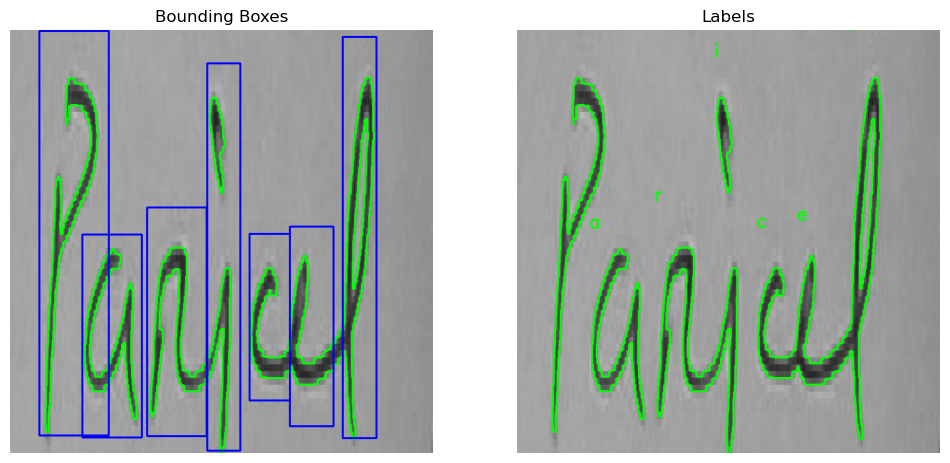

In [19]:
import os
from PIL import Image
import cv2
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt

# Load the image
#preprocessed_image_path = "preprocessed_image.jpg"
image_np = np.array(preprocessed_image) # Using OpenCV to read the image

# Perform inference
result_doch1 = CLIENT.infer(preprocessed_image, model_id="doctor-s-handwriting/1")

# Extract labels and detections
labels = [item["class"] for item in result_doch1["predictions"]]
detections = sv.Detections.from_inference(result_doch1)

# Debug: Print unsorted detections and labels
print("Unsorted Detections and Labels:")
for i, detection in enumerate(detections):
    print(f"Detection {i}: {detection} - Label: {labels[i]}")

# Function to extract the x1 coordinate from the detection
def get_x1(detection):
    # Extract the x1 coordinate from detection's bounding box
    return detection.xyxy[0][0]  # Access the first element of the bounding box array

# Sort detections and labels by the x-coordinate of the bounding box
sorted_indices = sorted(range(len(detections)), key=lambda i: get_x1(detections[i]))
sorted_detections = [detections[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

# Debug: Print sorted detections and labels
print("Sorted Detections and Labels:")
for i, detection in enumerate(sorted_detections):
    print(f"Detection {i}: {detection} - Label: {sorted_labels[i]}")

# Function to plot bounding boxes
def plot_bounding_boxes(image_np, detections):
    image_with_boxes = image_np.copy()
    for detection in detections:
        x1, y1, x2, y2 = detection.xyxy[0]  # Extract bounding box coordinates
        cv2.rectangle(image_with_boxes, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    return image_with_boxes

# Function to plot labels
def plot_labels(image_np, detections, labels):
    image_with_labels = image_np.copy()
    for i, detection in enumerate(detections):
        x1, y1, x2, y2 = detection.xyxy[0]  # Extract bounding box coordinates
        label = labels[i]
        cv2.putText(image_with_labels, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image_with_labels

# Plot bounding boxes with sorted detections
image_with_boxes = plot_bounding_boxes(image_np, sorted_detections)

# Plot labels with sorted detections and labels
image_with_labels = plot_labels(image_np, sorted_detections, sorted_labels)

# Convert images to RGB for plotting with matplotlib
image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
image_with_labels_rgb = cv2.cvtColor(image_with_labels, cv2.COLOR_BGR2RGB)

# Plot results using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Bounding Boxes")
plt.imshow(image_with_boxes_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Labels")
plt.imshow(image_with_labels_rgb)
plt.axis('off')

plt.show()

In [21]:
# Convert list to string
resulting_string = ''.join(sorted_labels)

print(resulting_string)

Paricel
